In [ ]:
import re

In [ ]:
def repetitions(s):
   r = re.compile(r"(.+?)\1+")
   for match in r.finditer(s):
       yield (match.group(1), len(match.group(0))/len(match.group(1)))

In [ ]:
list(repetitions("aaaa hjgj jgjgfj jgj jghg jhg jg jg f j jg jh ablablabla"))

[('a', 4.0),
 ('jg', 2.0),
 ('j jg', 2.0),
 ('hg j', 2.0),
 (' j', 2.0),
 ('abl', 3.0)]

---

In [4]:
import pandas as pd
import numpy as np

import networkx as nx

In [ ]:
ring1 = ["a", "b", "n", "c", "d", "e", "y", "w", "x"]
ring2 = ["m", "n", "c", "d", "e", "a", "w", "x"]
ring3 = ["a", "k", "c", "d", "h", "j", "x", "w"]
ring4 = ["1", "2", "i", "o", "c", "e"]

In [ ]:
elist = []
ring = [ring1, ring2, ring3, ring4]
for r in ring:
    for i in range(1, len(r)):
        elist.append((r[i-1], r[i]))
        if i == len(r)-1: elist.append((r[i], r[0]))

elist

[('a', 'b'),
 ('b', 'n'),
 ('n', 'c'),
 ('c', 'd'),
 ('d', 'e'),
 ('e', 'y'),
 ('y', 'w'),
 ('w', 'x'),
 ('x', 'a'),
 ('m', 'n'),
 ('n', 'c'),
 ('c', 'd'),
 ('d', 'e'),
 ('e', 'a'),
 ('a', 'w'),
 ('w', 'x'),
 ('x', 'm'),
 ('a', 'k'),
 ('k', 'c'),
 ('c', 'd'),
 ('d', 'h'),
 ('h', 'j'),
 ('j', 'x'),
 ('x', 'w'),
 ('w', 'a'),
 ('1', '2'),
 ('2', 'i'),
 ('i', 'o'),
 ('o', 'c'),
 ('c', 'e'),
 ('e', '1')]

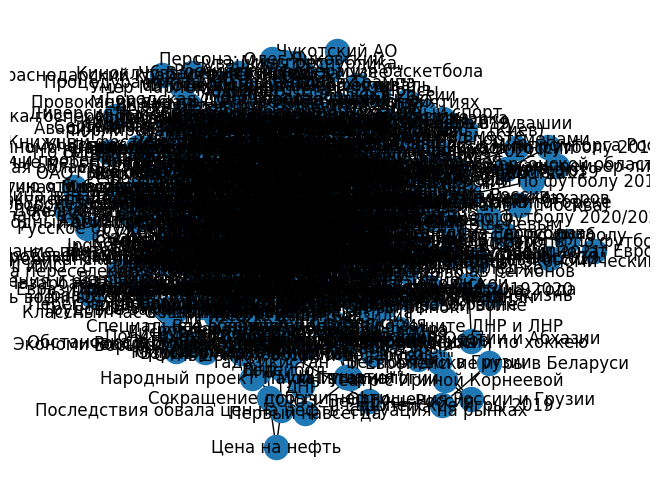

In [11]:
G = nx.MultiGraph()
G.add_edges_from(elist)
nx.draw(G, with_labels =True)

In [ ]:
cliques = nx.find_cliques(G)
cliques4 = [clq for clq in cliques if len(clq) >= 3]
cliques4

# с = G.subgraph(cliques4)
# nx.draw(с, with_labels=True)

[['x', 'w', 'a'], ['e', 'd', 'c']]

In [ ]:
deg = nx.degree(G)
# nodes = [n for n in deg if deg[n] >= 4]
# nodes
subG4list = [n for n in deg if n[1] >= 4]
subG4nodes = [n[0] for n in deg if n[1] >= 4]
print(subG4list)
print(subG4nodes)

[('a', 6), ('n', 4), ('c', 8), ('d', 6), ('e', 6), ('w', 6), ('x', 6)]
['a', 'n', 'c', 'd', 'e', 'w', 'x']


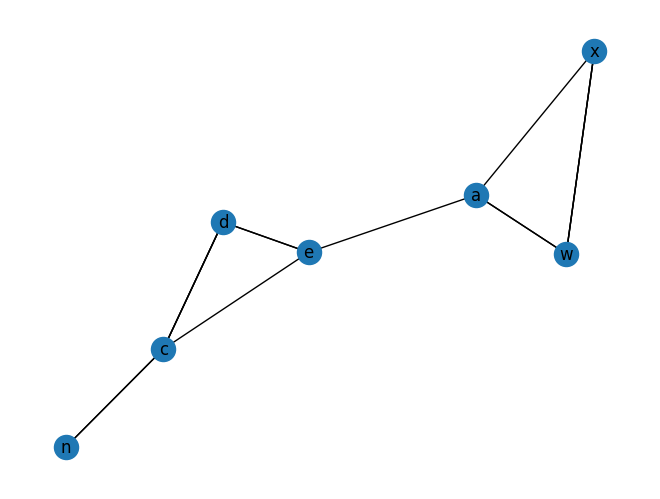

In [ ]:
k = G.subgraph(subG4nodes)
nx.draw(k, with_labels=True)

In [ ]:
def ring_to_nx(ring_list):
    edge_list = []
    for ring in ring_list:
        for i in range(1, len(ring)):
            edge_list.append((ring[i - 1], ring[i]))
            if i == len(ring) - 1:
                edge_list.append((ring[i], ring[0]))

    G = nx.MultiGraph()
    G.add_edges_from(edge_list)

    # nx.draw(G, with_labels=True)

    return G


def find_patterns(ring_list, min_len=3):
    G = ring_to_nx(ring_list)
    print(G)

    cliques = [clq for clq in nx.find_cliques(G) if len(clq) >= min_len]

    subgraph = [n for n in nx.degree(G) if n[1] >= min_len]
    subgraph_nodes = [n[0] for n in subgraph]

    subG = G.subgraph(subgraph_nodes)
    nx.draw(subG, with_labels=True)

    return (cliques, subgraph)


MultiGraph with 17 nodes and 31 edges


([], [('a', 6), ('n', 4), ('c', 8), ('d', 6), ('e', 6), ('w', 6), ('x', 6)])

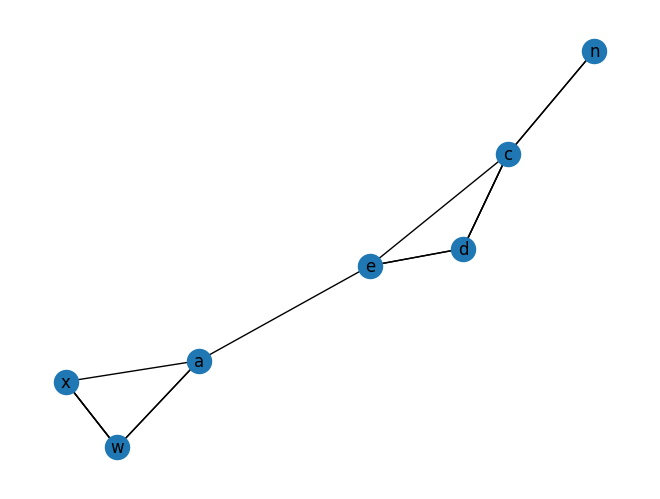

In [ ]:
ring1 = ["a", "b", "n", "c", "d", "e", "y", "w", "x"]
ring2 = ["m", "n", "c", "d", "e", "a", "w", "x"]
ring3 = ["a", "k", "c", "d", "h", "j", "x", "w"]
ring4 = ["1", "2", "i", "o", "c", "e"]
ring = [ring1, ring2, ring3, ring4]

find_patterns(ring, 4)

MultiGraph with 17 nodes and 31 edges


([], [('a', 8), ('b', 6), ('e', 6), ('w', 6), ('x', 6)])

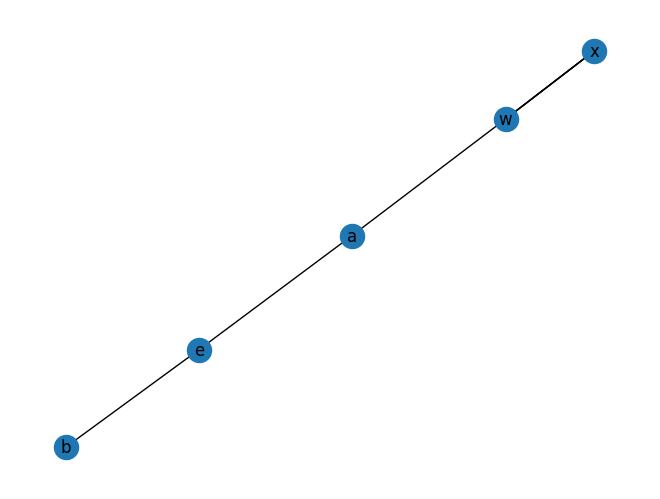

In [ ]:
ring1 = ["1", "a", "n", "b", "d", "e", "y", "w", "x"]
ring2 = ["2", "a", "c", "b", "e", "a", "w", "x"]
ring3 = ["3", "a", "4", "b", "h", "j", "x", "w"]
ring4 = ["4", "2", "i", "o", "c", "e"]
rings = [ring1, ring2, ring3, ring4]

find_patterns(rings, 5)

In [ ]:
def ring_to_nx_with_range(rings_list, range):
    edge_list = []
    for ring in rings_list:
        for i in range(1, len(ring)):
            edge_list.append((ring[i - 1], ring[i:i+range]))
            if i == len(ring) - 1:
                edge_list.append((ring[i], ring[0:range]))

    G = nx.MultiGraph()
    G.add_edges_from(edge_list)

    nx.draw(G, with_labels=True)

    return G

def find_patterns_in_range(rings_list, min_len=3, range=4):
    G = ring_to_nx_with_range(rings_list, range)
    print(G)

    cliques = [clq for clq in nx.find_cliques(G) if len(clq) >= min_len]

    clusters = []

    subgraph = [n for n in nx.degree(G) if n[1] >= min_len]
    subgraph_nodes = [n[0] for n in subgraph]

    subG = G.subgraph(subgraph_nodes)
    nx.draw(subG, with_labels=True)

    return (cliques, clusters, subgraph)


In [ ]:
l = [1, 2, 3, 4, 5, 6, 7, 8]
l[1:6]

edge_list = [(1, [2, 4]), (2, [1, 3])]

G = nx.MultiGraph()
G.add_edges_from(edge_list)

nx.draw(G, with_labels=True)

TypeError: unhashable type: 'list'

In [ ]:
ring1 = ["1", "a", "n", "b", "d", "e", "y", "w", "x"]
ring2 = ["2", "a", "c", "b", "e", "a", "w", "x"]
ring3 = ["3", "a", "4", "b", "h", "j", "x", "w"]
ring4 = ["4", "2", "i", "o", "c", "e"]
rings = [ring1, ring2, ring3, ring4]

# find_patterns(rings, 5)
ring_to_nx_with_range(rings, 3)

TypeError: 'int' object is not callable

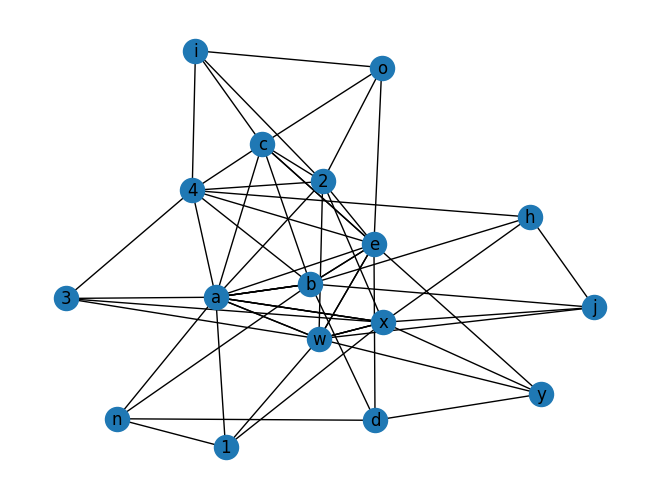

In [ ]:
ring1 = ["1", "a", "n", "b", "d", "e", "y", "w", "x"]
ring2 = ["2", "a", "c", "b", "e", "a", "w", "x"]
ring3 = ["3", "a", "4", "b", "h", "j", "x", "w"]
ring4 = ["4", "2", "i", "o", "c", "e"]
rings = [ring1, ring2, ring3, ring4]

edge_list = []
window_size = 3
window_list = []

for ring in rings:
    for i in range(0, len(ring) - window_size + 1):
        window = ring[i : i + window_size]
        window_list.append(window)
    else:
        for i, j in zip(range(len(ring) - window_size + 1, len(ring)), range(1, window_size)):
            window = ring[i : len(ring)] + ring[0:j]
            window_list.append(window)


window_list


for list in window_list:
    for i in range(1, len(list)):
        edge_list.append((list[0], list[i]))


edge_list


G = nx.MultiGraph()
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)

In [ ]:
D = nx.DiGraph()
for u,v in G.edges():
    if D.has_edge(u,v):
        D[u][v]['weight'] += 1
    else:
        D.add_edge(u, v, weight=1)

clustering = nx.clustering(D, weight='weight')
clustering

# D.edges(data=True)

# nx.draw(D, with_labels=True)

{'1': 0.10717542063561852,
 'a': 0.07593549586828725,
 'n': 0.07473752191600415,
 'w': 0.07910265869280582,
 'x': 0.0676729373065543,
 'b': 0.06638145673063636,
 '2': 0.07439402808169392,
 'c': 0.09651479942568983,
 'e': 0.07032698091352563,
 '3': 0.10717542063561852,
 '4': 0.06297876407034798,
 'd': 0.06791502187280986,
 'h': 0.06249999999999999,
 'j': 0.07171353271473767,
 'y': 0.07712855458754751,
 'o': 0.10958168853947652,
 'i': 0.10416666666666664}

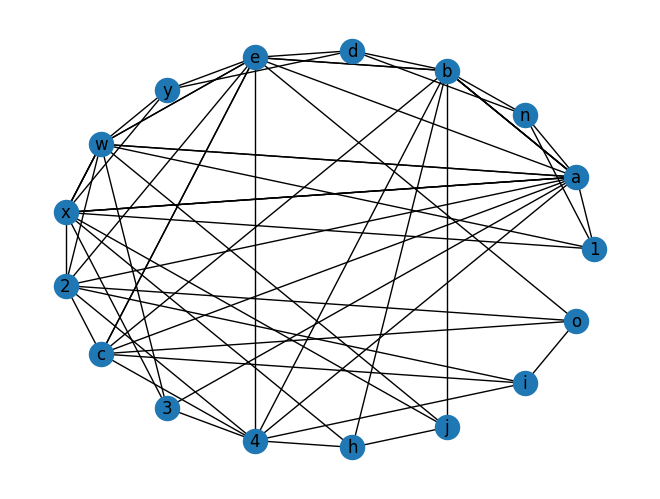

In [ ]:
nx.draw(G, pos=nx.circular_layout(G), with_labels=True)

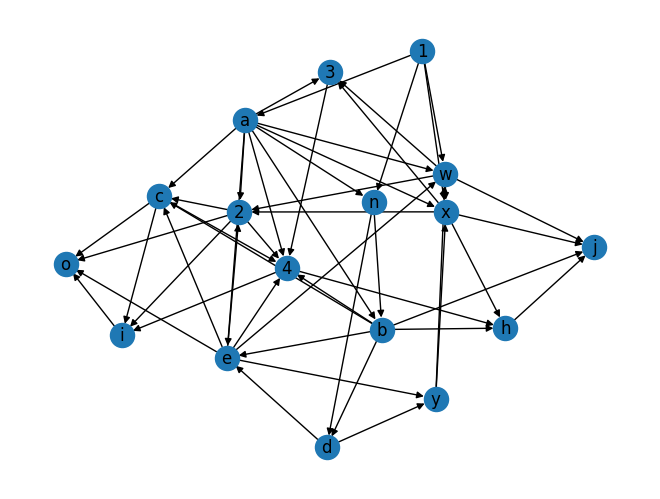

In [ ]:
nx.draw_kamada_kawai(D, with_labels = True)

In [ ]:
# Degree
print(sorted(G.degree, key=lambda x: x[1], reverse=True))

# Pageranks
pageranks = nx.pagerank(G) # A dictionary
# pageranks
print(sorted(pageranks, key=lambda x: x[1], reverse=True))

[('a', 16), ('b', 12), ('e', 12), ('w', 12), ('x', 12), ('2', 8), ('c', 8), ('4', 8), ('1', 4), ('n', 4), ('d', 4), ('y', 4), ('3', 4), ('h', 4), ('j', 4), ('i', 4), ('o', 4)]


IndexError: string index out of range

In [ ]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(G)
print([community for community in communities])

[{'3', 'i', '2', 'c', 'n', 'b', 'e', '1', 'y', 'h', 'd', 'x', '4', 'j', 'o', 'a', 'w'}]


4


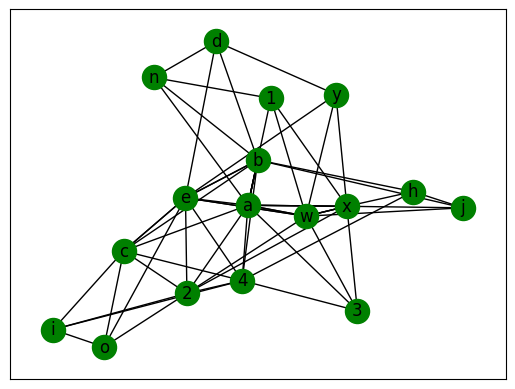

In [ ]:
nx.draw_networkx(G, with_labels = True, node_color ='green')
 
# returns True or False whether Graph is connected
# print(nx.is_connected(G))
 
# returns number of different connected components
# print(nx.number_connected_components(G))
 
# returns list of nodes in different connected components
# print(list(nx.connected_components(G)))
 
# returns list of nodes of component containing given node
# print(nx.node_connected_component(G, 'I'))
 
# returns number of nodes to be removed
# so that Graph becomes disconnected
# print(nx.node_connectivity(G))
 
# returns number of edges to be removed
# so that Graph becomes disconnected
# print(nx.edge_connectivity(G))

[] [('a', 10), ('w', 8), ('x', 8), ('b', 8), ('2', 8), ('c', 7), ('e', 9), ('4', 8)]


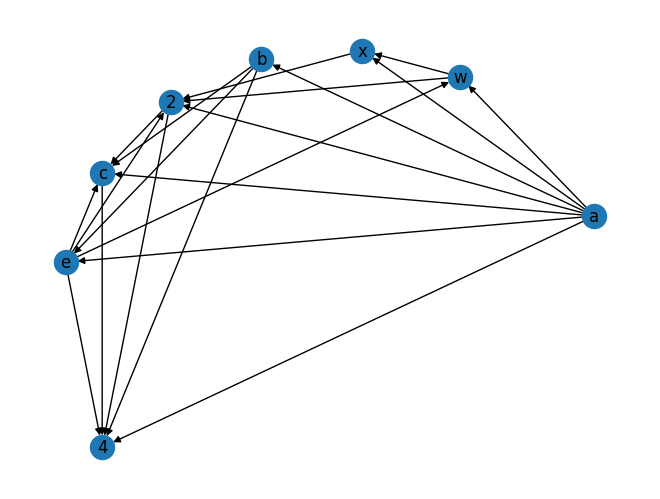

In [ ]:
# cliques = [clq for clq in nx.find_cliques(D) if len(clq) >= 6]

subgraph = [n for n in nx.degree(D) if n[1] >= 6]
subgraph_nodes = [n[0] for n in subgraph]

subG = D.subgraph(subgraph_nodes)
nx.draw(subG, pos=nx.circular_layout(D), with_labels=True)

print(cliques, subgraph)

In [ ]:
# let us now sort the degree centrality measure and identify the important nodes.
for ix, g in enumerate(G):
    temp_dict = {}
    for w in sorted(degree_centrality(g), key=degree_centrality(g0.get, reverse=True):
        temp_dict[w] = deg_cen[g][w]

    print("Sorted Importance of nodes in terms of deg_cen for Graph {} is {}".format(ix+1, list(temp_dict.keys())[:5]))

SyntaxError: invalid syntax (1346704990.py, line 4)

In [ ]:
graph2 = kn
color = []
fig = plt.subplots(1, figsize=(12,10))
for node in graph2:
    if (node == 33 or node == 0 or node == 32 or node==2 or node==1):
        color.append(‘red’)
    else:
        color.append(‘blue’)
 
nx.draw_spring(graph2,node_color=color,with_labels=True)

In [1]:
import pandas as pd
import os

In [2]:
folder_path = '/work/rings'

csv_files = [
    file[:-4] 
    for file in os.listdir(folder_path) 
    if file.startswith('cosine') and file.endswith('.csv')
]

csv_files

['cosine20', 'cosine21', 'cosine19', 'cosine22', 'cosine18']

In [3]:
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file+".csv")
    vars()[f"{csv_file}"] = pd.read_csv(file_path)

In [7]:
rings = []
for csv_file in csv_files:
    vars()[f"{csv_file}_list"] = vars()[f"{csv_file}"]['x'].values.tolist()
    rings.append(vars()[f"{csv_file}_list"])

In [10]:
elist = []
for r in rings:
    for i in range(1, len(r)):
        elist.append((r[i-1], r[i]))
        if i == len(r)-1: elist.append((r[i], r[0]))

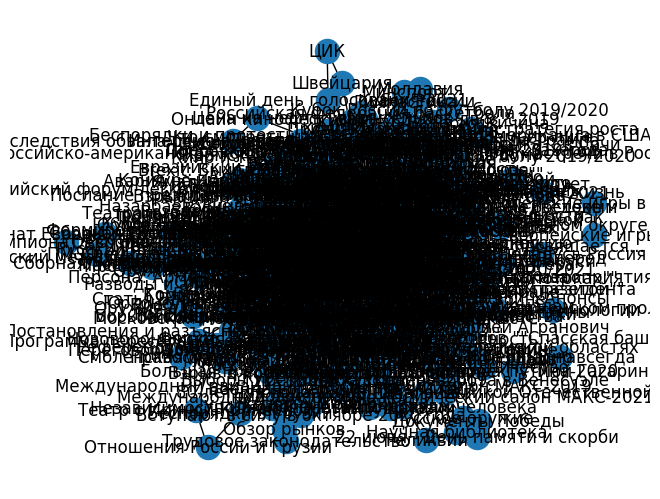

In [24]:
G = nx.MultiGraph()
G.add_edges_from(elist)
nx.draw(G, with_labels =True)

In [35]:
cliques = [clq for clq in nx.find_cliques(G) if len(clq) >= 10]

subgraph = [n for n in nx.degree(G) if n[1] >= 10]
subgraph_nodes = [n[0] for n in subgraph]

subG = G.subgraph(subgraph_nodes)

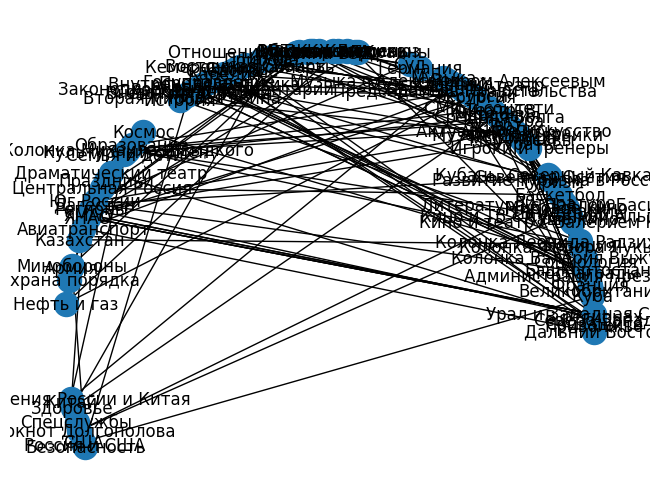

In [36]:
nx.draw(subG, pos=nx.circular_layout(G), with_labels=True)

In [37]:
print(cliques, subgraph)

[] [('Дальний Восток', 10), ('Приволжье', 10), ('Соцзащита', 10), ('Северо-Запад', 10), ('В регионах', 10), ('Урал и Западная Сибирь', 10), ('Куба', 10), ('Великобритания', 10), ('Франция', 10), ('Администрация Президента', 10), ('Госнаграды', 10), ('Башкортостан', 10), ('Социология', 10), ('Колонка Валерия Выжутовича', 10), ('Колонка Федора Лукьянова', 10), ('Позиция', 10), ('Колонка Леонида Радзиховского', 10), ('Кино и театр с Валерием Кичиным', 10), ('Наше кино', 10), ('Кино и ТВ с Сусанной Альпериной', 10), ('ТВ и сериалы', 10), ('Гид-парк', 10), ('Мировое кино', 10), ('Литература с Павлом Басинским', 10), ('Литература', 10), ('Баскетбол', 10), ('Туризм', 10), ('Развитие туризма в России', 10), ('Северная Осетия', 10), ('Кубань. Северный Кавказ', 10), ('Игроки и тренеры', 10), ('Утраты', 10), ('Мэр Москвы', 10), ('Столица', 10), ('Музеи и памятники', 10), ('Архитектура', 10), ('Актуальное искусство', 10), ('Живопись', 10), ('Арт', 10), ('Культура', 10), ('Средняя Волга', 10), ('Мо

In [38]:
D = nx.DiGraph()
for u,v in G.edges():
    if D.has_edge(u,v):
        D[u][v]['weight'] += 1
    else:
        D.add_edge(u, v, weight=1)

clustering = nx.clustering(D, weight='weight')
clustering

{'Якутия': 0,
 'Дальний Восток': 0,
 'Италия': 0,
 'Вакцинация от коронавируса': 0.012599210498948733,
 'Хоккей с мячом': 0,
 'Отдых и туризм в России': 0,
 'Авиатранспорт': 0,
 'Помощь пострадавшим': 0,
 'Новости': 0,
 'Пожары': 0,
 'Общество': 0.005999624047118444,
 'Стихийные бедствия': 0,
 'Приволжье': 0,
 'Соцзащита': 0,
 'Башкортостан': 0,
 'Физкультура': 0,
 'Танец': 0,
 'Карелия': 0,
 'Религия': 0,
 'СМИ и соцсети': 0,
 'Минкультуры': 0,
 'Тюрьмы': 0,
 'Северо-Запад': 0,
 'Куба': 0.0022222222222222222,
 'Пенсии и пособия': 0,
 'Владимир Путин: статьи и интервью': 0.006666666666666667,
 'Социология': 0,
 'Миграция': 0,
 'Жилая недвижимость': 0,
 'Кемеровская область': 0,
 'В регионах': 0,
 'Драматический театр': 0,
 'Живопись': 0.009777339166082628,
 'Водный транспорт': 0,
 'Кубок Первого канала по хоккею': 0,
 'Урал и Западная Сибирь': 0.010902040405269828,
 'Столица': 0.012599210498948733,
 'Регионы': 0,
 'Пресс-релизы УрФО': 0,
 'ЯНАО': 0.010902040405269828,
 'ХМАО': 0.015262

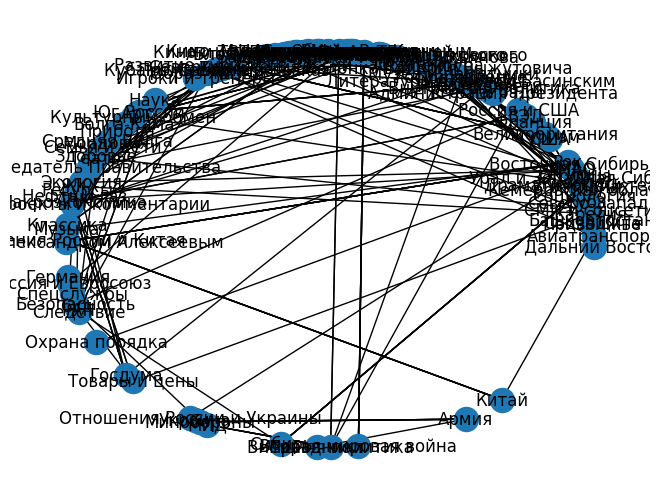

In [39]:
nx.draw(subG, pos=nx.circular_layout(D), with_labels=True)

In [41]:
D.nodes()

NodeView(('Якутия', 'Дальний Восток', 'Италия', 'Вакцинация от коронавируса', 'Хоккей с мячом', 'Отдых и туризм в России', 'Авиатранспорт', 'Помощь пострадавшим', 'Новости', 'Пожары', 'Общество', 'Стихийные бедствия', 'Приволжье', 'Соцзащита', 'Башкортостан', 'Физкультура', 'Танец', 'Карелия', 'Религия', 'СМИ и соцсети', 'Минкультуры', 'Тюрьмы', 'Северо-Запад', 'Куба', 'Пенсии и пособия', 'Владимир Путин: статьи и интервью', 'Социология', 'Миграция', 'Жилая недвижимость', 'Кемеровская область', 'В регионах', 'Драматический театр', 'Живопись', 'Водный транспорт', 'Кубок Первого канала по хоккею', 'Урал и Западная Сибирь', 'Столица', 'Регионы', 'Пресс-релизы УрФО', 'ЯНАО', 'ХМАО', 'Взрыв газа в жилом доме в Магнитогорске', 'Восточная Сибирь', 'Рок', 'Российский футбольный союз', 'Вокруг футбола', 'Армения', '""Спартак""', 'Минприроды', 'ДТП', 'СПБГАСУ: строим будущее вместе', 'Азербайджан', 'Валютный рынок', 'Несчастные случаи', 'МОК', 'Деловой завтрак', 'США', 'Туризм', 'Документальное 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d79deab-c9c6-414b-8803-1e385542ff1f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>